In [77]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
path="/content/gdrive/MyDrive/Raw_data/S01"
allfilies=glob.glob(path+"/*.csv")

In [80]:
data=pd.concat([pd.read_csv(f) for f in allfilies],ignore_index=True)

In [81]:
data.head()

,1644226061.000000,1644226061.000000,1644226061.000000.1,IBI,1644226140,1644226071.000000,1644226061
0,4.00,NaN,NaN,NaN,NaN,NaN,NaN
1,28.39,NaN,NaN,NaN,NaN,NaN,NaN
2,28.39,NaN,NaN,NaN,NaN,NaN,NaN
3,28.39,NaN,NaN,NaN,NaN,NaN,NaN
4,28.39,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data.isnull().sum()

1644226061.000000       211964
 1644226061.000000      239314
 1644226061.000000.1    239314
 IBI                    342365
1644226140              343616
1644226071.000000       340374
1644226061              134921
dtype: int64

In [29]:
data.shape

(343625, 7)

In [89]:
# Calculate the mean of the column
mean_value = data[' IBI'].mean()
# Fillthe null values with the mean
data[' IBI'].fillna(mean_value, inplace=True)
# Calculate the mean of the column
mean_value = data[' 1644226061.000000'].mean()
# Fillthe null values with the mean
data[' 1644226061.000000'].fillna(mean_value, inplace=True)
mean_value = data[' 1644226061.000000.1'].mean()
# Fillthe null values with the mean
data[' 1644226061.000000.1'].fillna(mean_value, inplace=True)
mean_value = data['1644226140'].mean()
# Fillthe null values with the mean
data['1644226140'].fillna(mean_value, inplace=True)
mean_value = data['1644226061'].mean()
# Fillthe null values with the mean
data['1644226061'].fillna(mean_value, inplace=True)

In [90]:
data.head()

,1644226061.000000,1644226061.000000,1644226061.000000.1,IBI,1644226140,1644226071.000000,1644226061
0,4.00,7.314109,38.13222,0.914745,1.644228e+09,NaN,0.003117
1,28.39,7.314109,38.13222,0.914745,1.644228e+09,NaN,0.003117
2,28.39,7.314109,38.13222,0.914745,1.644228e+09,NaN,0.003117
3,28.39,7.314109,38.13222,0.914745,1.644228e+09,NaN,0.003117
4,28.39,7.314109,38.13222,0.914745,1.644228e+09,NaN,0.003117


In [93]:
Ls=LabelEncoder()
data=data.apply(lambda x:Ls.fit_transform(x))

In [94]:
data.head()

,1644226061.000000,1644226061.000000,1644226061.000000.1,IBI,1644226140,1644226071.000000,1644226061
0,771,101,122,19,4,1410,16703
1,855,101,122,19,4,1410,16703
2,855,101,122,19,4,1410,16703
3,855,101,122,19,4,1410,16703
4,855,101,122,19,4,1410,16703


In [97]:
data.dtypes

1644226061.000000       int64
 1644226061.000000      int64
 1644226061.000000.1    int64
 IBI                    int64
1644226140              int64
1644226071.000000       int64
1644226061              int64
dtype: object

<ipython-input-112-95ba1693ab86>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[' IBI'], shade=True)


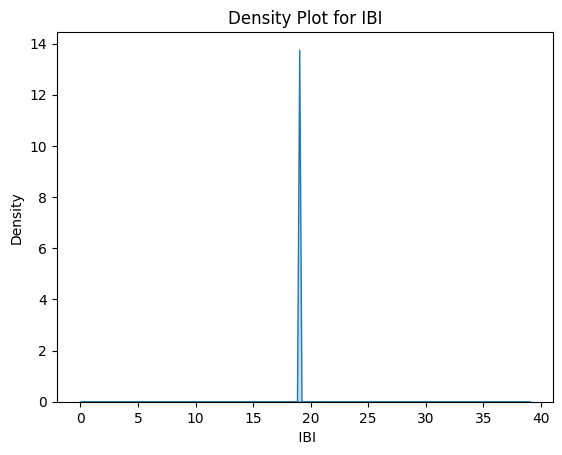

In [112]:
# Create the density plot using seaborn
sns.kdeplot(data[' IBI'], shade=True)

# Add a title and labels to the plot
plt.title("Density Plot for IBI")
plt.xlabel(" IBI")
plt.ylabel("Density")

# Show the plot
plt.show()

In [98]:
x=data.drop([' IBI'],axis=1)
y=data[' IBI']

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=42)

In [100]:
Rf=RandomForestRegressor()
Rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [106]:
# Make predictions on test set
y_pred = Rf.predict(xtest)

# Calculate MSE and RMSE
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.059281967604314
RMSE: 0.24347888533569806


In [109]:
# Fit linear regression model
reg = LinearRegression().fit(xtrain, ytrain)

# Make predictions on test set
y_pred = reg.predict(xtest)

# Calculate mean squared error and R2 score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

MSE: 0.12244648482346843
R2 score: 0.0004751396155581178
